In [1]:
import pandas as pd
import os
import re
import plotly.express as px
import plotly.graph_objects as go
import plotlyshare
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# import from ../utils.py
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from utils import read_finalsum, get_dbref_data, get_uniprot_id, read_finalsum_decomp, read_scoresEnergetics

c:\Users\liyoa\anaconda3\envs\sbna\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated and will be removed in a future release



In [45]:
pd.read_csv("Census_allTue Apr  9 04_58_38 2024.csv")["Gene Symbol"].nunique()

743

# 1. number of structures analysis

In [46]:
cgc_data = pd.read_csv('Census_all_with_pdb.csv')

In [49]:
cgc_data[cgc_data['Gene Symbol']=="TP53"]

,Gene Symbol,Name,Entrez GeneId,Genome Location,Tier,Hallmark,Chr Band,Somatic,Germline,Tumour Types(Somatic),...,Tissue Type,Molecular Genetics,Role in Cancer,Mutation Types,Translocation Partner,Other Germline Mut,Other Syndrome,Synonyms,PDB Structures,n_structures
693,TP53,tumor protein p53,7157.0,17:7668402-7687538,1,Yes,17p13.1,yes,yes,"breast, colorectal, lung, sarcoma, adrenocorti...",...,"L, E, M, O",Rec,"oncogene, TSG, fusion","Mis, N, F, T",NTRK1,NaN,NaN,"CCDS11118.1,ENSG00000141510.16,LFS1,NM_0012767...","['1A1U', '1AIE', '1C26', '1DT7', '1GZH', '1H26...",268


In [47]:
cgc_data['n_structures'].sum()

14202

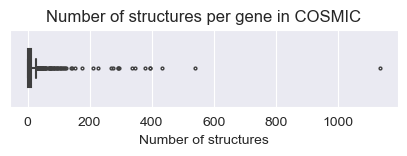

In [39]:
# plot boxplot of n_structures
plt.figure(figsize=(5, 1))
sns.boxplot(data=cgc_data, x='n_structures', width=0.5, linewidth=1.5, fliersize=2)
plt.title('Number of structures per gene in COSMIC')
plt.xlabel('Number of structures')

plt.show()



In [3]:
fig = px.histogram(cgc_data, x="n_structures")
fig.show()

In [4]:
# horizontal boxplot
fig = px.box(cgc_data, x="n_structures", orientation='h')
fig.show()

### read clean residue data

In [5]:
residue_data = pd.read_csv('final_data.csv')
residue_data.head()

,gene_symbol,pdb_id,chain,uniprot_id,assoc_gene,resolution,num,res_code,uniprot_res,network_score,SecondOrderIntermodularDegree_AVERAGE,NodeEdgeBetweennessSTRIDE_sidechain_MAX,LigandMULTIMERCENTROIDSC_MIN,outside_range,residue_match
0,EGFR,3POZ,A,P00533,EGFR,1.5,701,Q,Q,-3.791355,-1.246142,-0.541346,2.003868,False,True
1,EGFR,3POZ,A,P00533,EGFR,1.5,702,A,A,-2.634055,-1.088502,-0.455538,1.090015,False,True
2,EGFR,3POZ,A,P00533,EGFR,1.5,703,L,L,-1.231055,-0.643414,-0.105177,0.482465,False,True
3,EGFR,3POZ,A,P00533,EGFR,1.5,704,L,L,0.452193,0.377611,0.205135,0.130553,False,True
4,EGFR,3POZ,A,P00533,EGFR,1.5,705,R,R,-1.086163,0.107137,-0.523559,0.669741,False,True


In [6]:
residue_data[residue_data['gene_symbol']=="EGFR"]['pdb_id'].unique()

array(['3POZ', '3VRP', '3W32', '3W33', '4I22', '4I24', '5CNO', '5GNK',
       '5HG5', '5HG8', '5U8L', '5UG8', '5UG9', '5UGA', '5UGC', '6TFV',
       '6TFY', '6TFZ', '6TG0', '6TG1', '6V66', '6WXN', '7JXQ', '7SI1',
       '8A27', '8A2A', '8A2B', '8A2D'], dtype=object)

# 2. Compare NS between different crystals of same protein

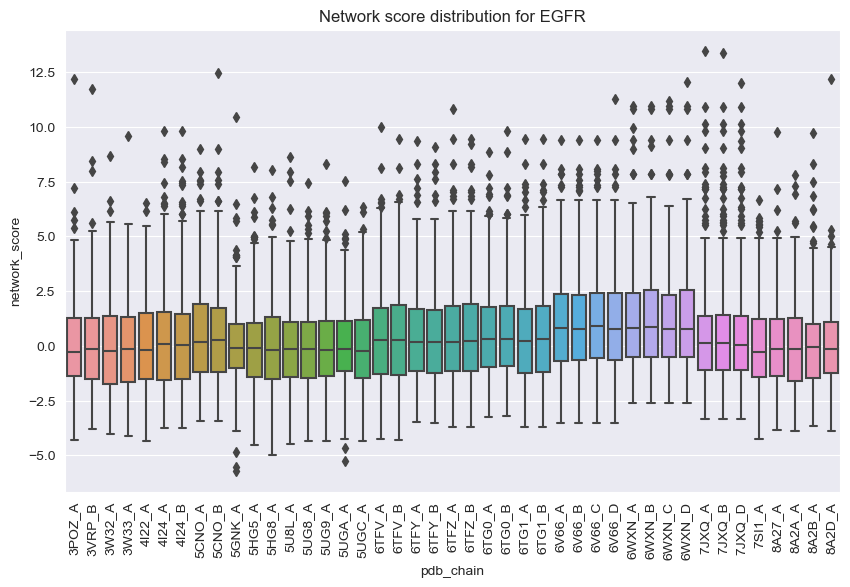

In [5]:
tmp = residue_data[residue_data['gene_symbol']=="EGFR"].reset_index(drop=True)
tmp['pdb_chain'] = tmp['pdb_id'] + '_' + tmp['chain']

# plot boxplot of network score for EGFR for each pdb_chain
plt.figure(figsize=(10, 6))
sns.boxplot(data=tmp, x='pdb_chain', y='network_score')
plt.xticks(rotation=90)
plt.title('Network score distribution for EGFR')
plt.show()

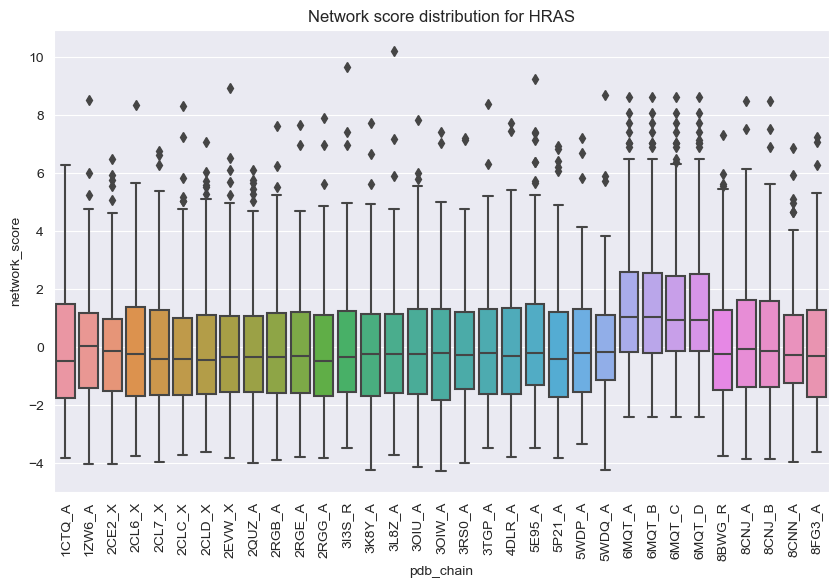

In [6]:
tmp = residue_data[residue_data['gene_symbol']=="HRAS"].reset_index(drop=True)
tmp['pdb_chain'] = tmp['pdb_id'] + '_' + tmp['chain']

# plot boxplot of network score for EGFR for each pdb_chain
plt.figure(figsize=(10, 6))
sns.boxplot(data=tmp, x='pdb_chain', y='network_score')
plt.xticks(rotation=90)
plt.title('Network score distribution for HRAS')
plt.show()

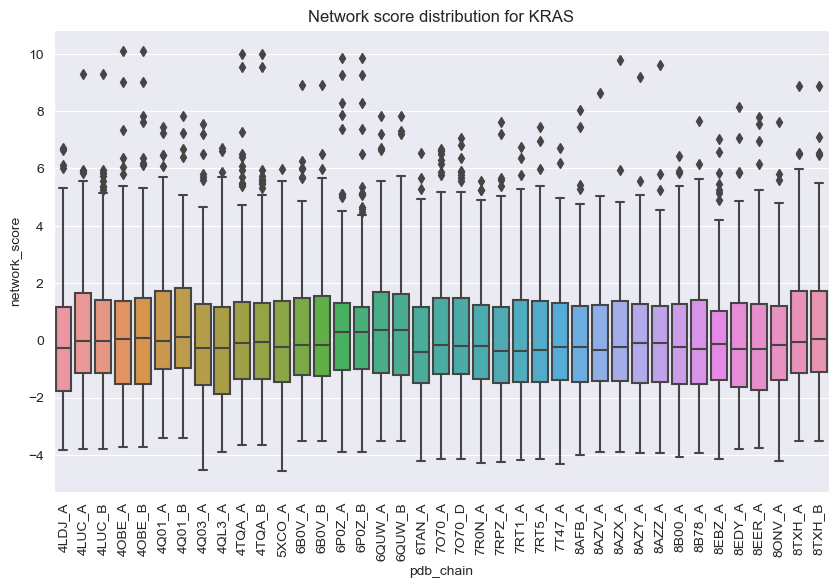

In [7]:
tmp = residue_data[residue_data['gene_symbol']=="KRAS"].reset_index(drop=True)
tmp['pdb_chain'] = tmp['pdb_id'] + '_' + tmp['chain']

# plot boxplot of network score for EGFR for each pdb_chain
plt.figure(figsize=(10, 6))
sns.boxplot(data=tmp, x='pdb_chain', y='network_score')
plt.xticks(rotation=90)
plt.title('Network score distribution for KRAS')
plt.show()

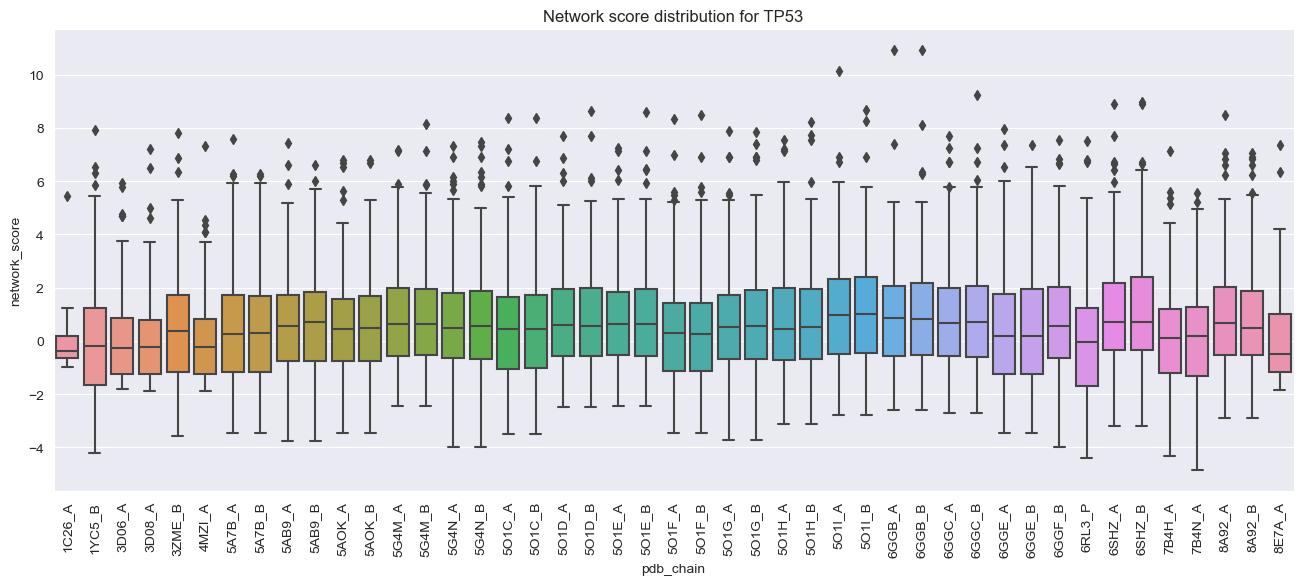

In [8]:
tmp = residue_data[residue_data['gene_symbol']=="TP53"].reset_index(drop=True)
tmp['pdb_chain'] = tmp['pdb_id'] + '_' + tmp['chain']

# plot boxplot of network score for EGFR for each pdb_chain
plt.figure(figsize=(16, 6))
sns.boxplot(data=tmp, x='pdb_chain', y='network_score')
plt.title('Network score distribution for TP53')
plt.xticks(rotation=90)
plt.show()

## correlation matrix for NS

In [7]:
cgc_data = pd.read_csv('Census_all_with_pdb.csv')

tmp_genes = ['TP53', 'KRAS', 'HRAS', 'EGFR']
cgc_data = cgc_data[cgc_data['Gene Symbol'].isin(tmp_genes)]


In [11]:
residue_data = pd.read_csv('../lung_cancer/lung_genes_sbna.csv')
residue_data['pdb_chain'] = residue_data['pdb_id'] + '_' + residue_data['chain']
residue_data.head()

,gene,pdb_id,chain,sbna_aa3,sbna_num,sbna_aa1,uniprot_num,uniprot_aa,network_score,SecondOrderIntermodularDegree_AVERAGE,NodeEdgeBetweennessSTRIDE_sidechain_MAX,LigandMULTIMERCENTROIDSC_MIN,mutant,mutations,cgc_tier,cancer_role,uniprot_aa_type,sbna_aa_type,pdb_chain
0,AKT1,2UVM,A,MET,1,M,1,M,-3.289764,-0.887739,-0.599135,1.802890,N,NaN,1,oncogene,Hydrophobic,Hydrophobic,2UVM_A
1,AKT1,2UVM,A,SER,2,S,2,S,-3.211822,-0.780412,-0.514186,1.917224,N,NaN,1,oncogene,Polar uncharged,Polar uncharged,2UVM_A
2,AKT1,2UVM,A,ASP,3,D,3,D,-2.323640,-0.348912,-0.599135,1.375593,N,NaN,1,oncogene,Polar charged negative,Polar charged negative,2UVM_A
3,AKT1,2UVM,A,VAL,4,V,4,V,-1.720478,-0.423430,-0.430810,0.866237,N,NaN,1,oncogene,Hydrophobic,Hydrophobic,2UVM_A
4,AKT1,2UVM,A,ALA,5,A,5,A,-0.735485,-0.359177,0.880892,1.257200,N,NaN,1,oncogene,Hydrophobic,Hydrophobic,2UVM_A


In [14]:
for gene in tmp_genes:
    tmp = residue_data[residue_data['gene']==gene].reset_index(drop=True)
    unique_pdbs = tmp['pdb_id'].unique()
    for pdb in unique_pdbs:
        # check if finalsum file exists
        if not os.path.exists(f"../sbna_results/{pdb}"):
            continue
        dbrefs = get_dbref_data(pdb)
        for i in dbrefs:
            print(gene, pdb, i)
    

TP53 4LOE {'chain': 'A', 'uniprot': 'P04637', 'start': 94, 'end': 312, 'uniprot_gene': 'P53_HUMAN'}
TP53 4LOE {'chain': 'B', 'uniprot': 'P04637', 'start': 94, 'end': 312, 'uniprot_gene': 'P53_HUMAN'}
TP53 4LOE {'chain': 'C', 'uniprot': 'P04637', 'start': 94, 'end': 312, 'uniprot_gene': 'P53_HUMAN'}
TP53 4LOE {'chain': 'D', 'uniprot': 'P04637', 'start': 94, 'end': 312, 'uniprot_gene': 'P53_HUMAN'}
TP53 2OCJ {'chain': 'A', 'uniprot': 'P04637', 'start': 94, 'end': 312, 'uniprot_gene': 'P53_HUMAN'}
TP53 2OCJ {'chain': 'B', 'uniprot': 'P04637', 'start': 94, 'end': 312, 'uniprot_gene': 'P53_HUMAN'}
TP53 2OCJ {'chain': 'C', 'uniprot': 'P04637', 'start': 94, 'end': 312, 'uniprot_gene': 'P53_HUMAN'}
TP53 2OCJ {'chain': 'D', 'uniprot': 'P04637', 'start': 94, 'end': 312, 'uniprot_gene': 'P53_HUMAN'}
TP53 4LO9 {'chain': 'A', 'uniprot': 'P04637', 'start': 94, 'end': 312, 'uniprot_gene': 'P53_HUMAN'}
TP53 4LO9 {'chain': 'B', 'uniprot': 'P04637', 'start': 94, 'end': 312, 'uniprot_gene': 'P53_HUMAN'}


* TP53: there seems to be a lot of structures that range from residue 94 to 293
* KRAS: 1 to 169
* HRAS: 1 to 166
* EGFR: 695 to 1022

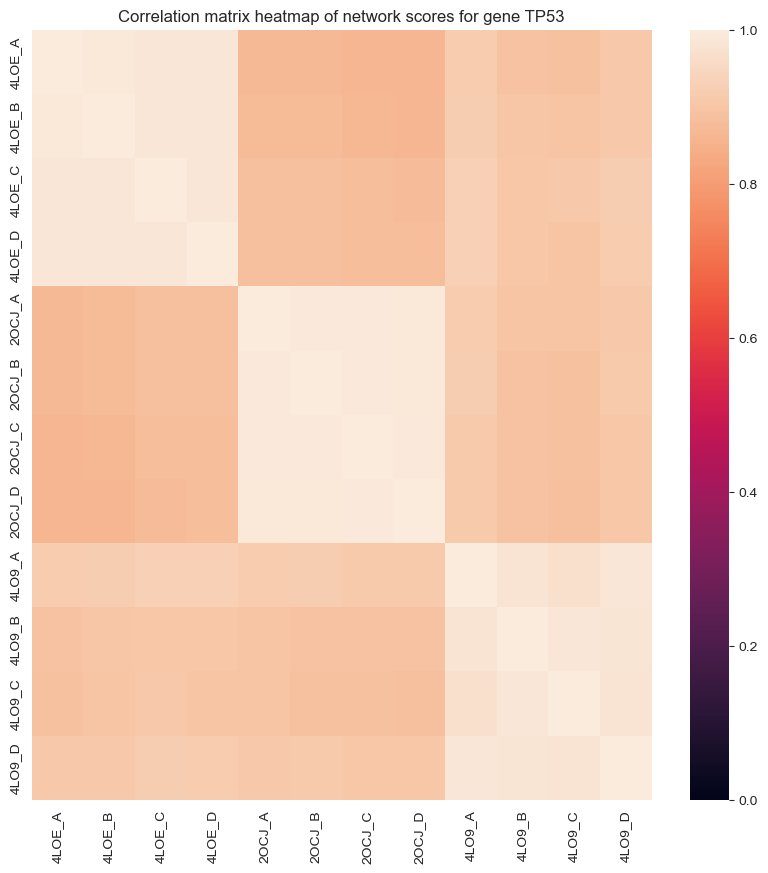

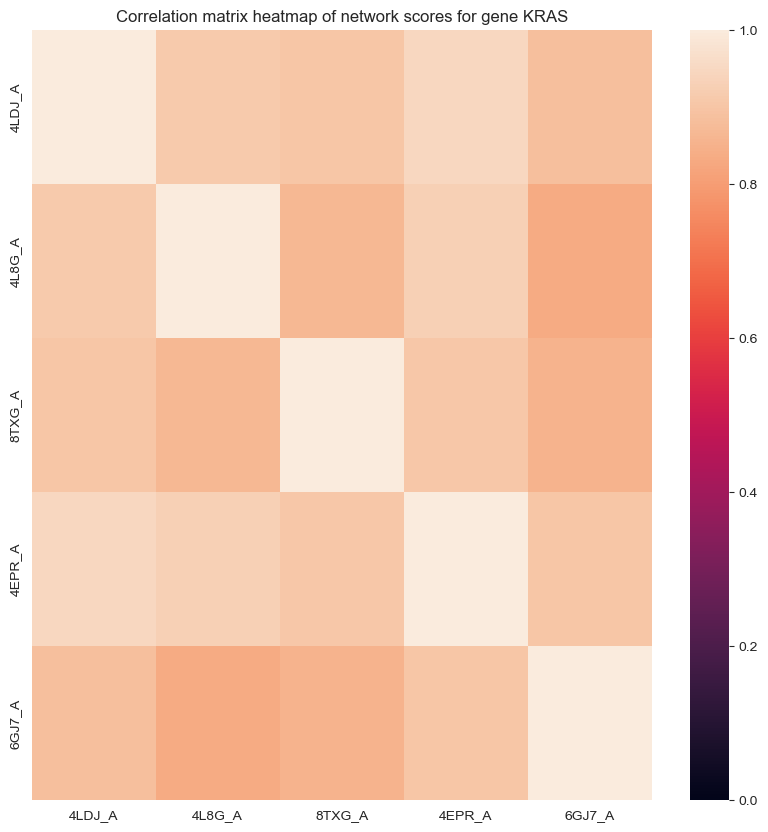

c:\Users\liyoa\anaconda3\envs\sbna\Lib\site-packages\seaborn\matrix.py:309: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.

c:\Users\liyoa\anaconda3\envs\sbna\Lib\site-packages\seaborn\matrix.py:309: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



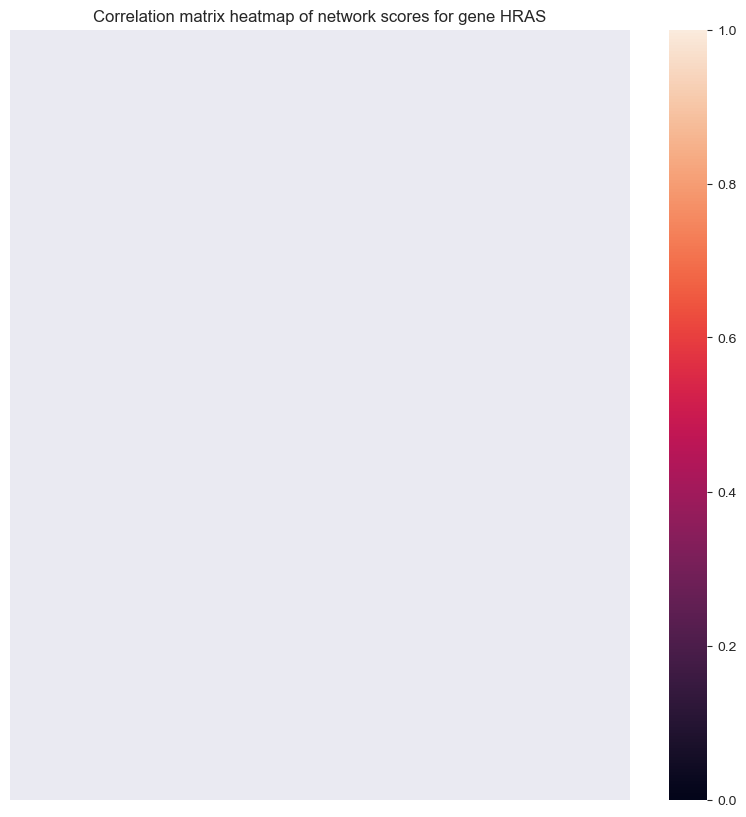

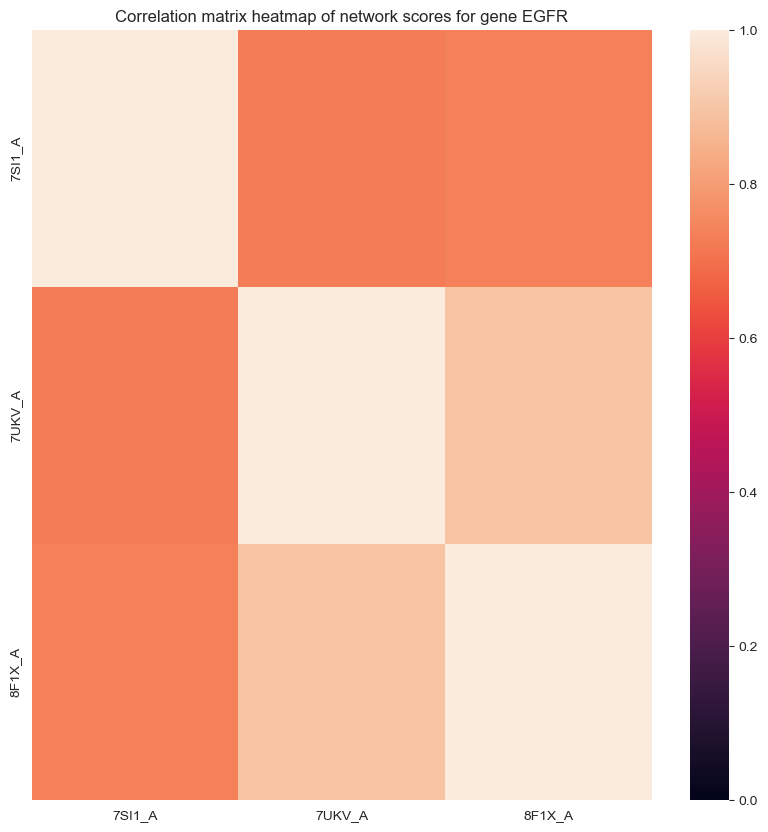

In [16]:
start_end = {"TP53": (94, 312), "KRAS": (1, 169), "HRAS": (1, 166), "EGFR": (695, 1022)}
corr_data = {}

for gene in tmp_genes:
    all_scores = pd.DataFrame({"num": list(range(start_end[gene][0], start_end[gene][1]+1))})
    tmp = residue_data[residue_data['gene']==gene].reset_index(drop=True)
    unique_pdbs = tmp['pdb_id'].unique()
    
    for pdb in unique_pdbs:
        # check if finalsum file exists
        dbrefs = get_dbref_data(pdb)
        
        for i in dbrefs:
            if not os.path.exists(f"../sbna_results/{pdb}/{i["chain"]}/{pdb}_monomer/FinalSum") or \
                get_uniprot_id(pdb, i['chain']) != i['uniprot']: #or \
                # tmp[(tmp['pdb_id']=="5XCO") & (tmp['chain']=="A")]['residue_match'].mean():
                continue
             
            if start_end[gene][0] == i['start'] and start_end[gene][1] == i['end']:
                final_sum = read_finalsum(pdb, i['chain'])[['num', 'network_score']]
                final_sum.columns = ['num', f"{pdb}_{i['chain']}"]
                all_scores = pd.merge(all_scores, final_sum, on='num', how='inner')

    corr_data[gene] = all_scores.drop('num',axis=1).corr()
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr_data[gene], vmin=0, vmax=1)
    plt.title(f'Correlation matrix heatmap of network scores for gene {gene}')
    plt.show()

### 1. average correlation  vs percentage residue match of uniprot

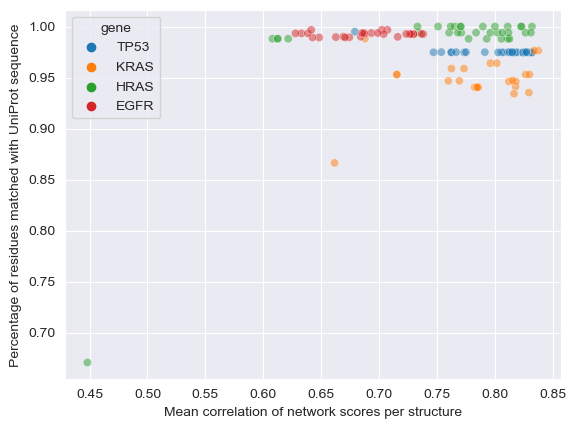

In [6]:
# average correlation per gene per structure
all_data = pd.DataFrame()

for gene in tmp_genes:
    tmp = pd.DataFrame(corr_data[gene].mean()).reset_index()
    tmp.columns = ['pdb_chain', 'mean_corr']
    perc_res_match = []
    for pdb_chain in tmp['pdb_chain']:
        perc_res_match.append(residue_data[(residue_data['pdb_id']==pdb_chain.split('_')[0]) & (residue_data['chain']==pdb_chain.split('_')[1])]['residue_match'].mean())
    tmp['perc_res_match'] = perc_res_match
    tmp['gene'] = gene

    all_data = pd.concat([all_data, tmp])
all_data

# plot scatter plot
sns.scatterplot(data=all_data, x='mean_corr', y='perc_res_match', hue='gene', alpha=0.5)
plt.xlabel('Mean correlation of network scores per structure')
plt.ylabel('Percentage of residues matched with UniProt sequence')
plt.show()

* Ok this does not really show that the correlation is related to the percentage residue match...except that 5E95_A anomaly in HRAS.
* why does KRAS structures have such low percentage residue match?

### 2. correlation vs percentage residue match with other structure

In [9]:
tmp.columns

Index(['gene_symbol_3ZME_B', 'pdb_id_3ZME_B', 'chain_3ZME_B',
       'uniprot_id_3ZME_B', 'assoc_gene_3ZME_B', 'resolution_3ZME_B', 'num',
       'res_code_3ZME_B', 'uniprot_res_3ZME_B', 'network_score_3ZME_B',
       'SecondOrderIntermodularDegree_AVERAGE_3ZME_B',
       'NodeEdgeBetweennessSTRIDE_sidechain_MAX_3ZME_B',
       'LigandMULTIMERCENTROIDSC_MIN_3ZME_B', 'outside_range_3ZME_B',
       'residue_match_3ZME_B', 'pdb_chain_3ZME_B', 'gene_symbol_5A7B_A',
       'pdb_id_5A7B_A', 'chain_5A7B_A', 'uniprot_id_5A7B_A',
       'assoc_gene_5A7B_A', 'resolution_5A7B_A', 'res_code_5A7B_A',
       'uniprot_res_5A7B_A', 'network_score_5A7B_A',
       'SecondOrderIntermodularDegree_AVERAGE_5A7B_A',
       'NodeEdgeBetweennessSTRIDE_sidechain_MAX_5A7B_A',
       'LigandMULTIMERCENTROIDSC_MIN_5A7B_A', 'outside_range_5A7B_A',
       'residue_match_5A7B_A', 'pdb_chain_5A7B_A'],
      dtype='object')

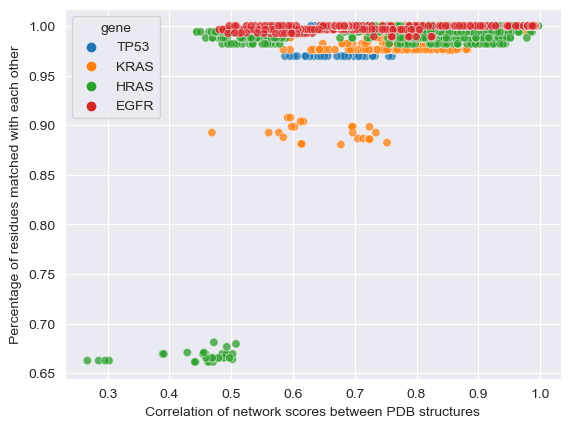

In [11]:
# create a dataframe with column gene, pdb-pdb, correlation, percentage_match
all_data = pd.DataFrame()
for gene in tmp_genes:
    for pdb1 in corr_data[gene].columns:
        for pdb2 in corr_data[gene].columns:
            if pdb1 == pdb2:
                continue
            tmp1 = residue_data[residue_data['pdb_chain']==pdb1]
            tmp2 = residue_data[residue_data['pdb_chain']==pdb2]
            # join two dataframes
            tmp = pd.merge(tmp1, tmp2, on='num', how='inner', suffixes=('_'+pdb1, '_'+pdb2))
            # percentage match pdb_res
            perc_match = (tmp['res_code_'+pdb1] == tmp['res_code_'+pdb2]).mean()
            # correlation
            corr = corr_data[gene][pdb1][pdb2]
            all_data = pd.concat([all_data, pd.DataFrame({'gene': [gene], 'pdb_pdb': [f"{pdb1}-{pdb2}"], 'correlation': [corr], 'percentage_match': [perc_match]})])

# plot scatter plot
sns.scatterplot(data=all_data, x='correlation', y='percentage_match', hue='gene', alpha=0.5)
plt.xlabel('Correlation of network scores between PDB structures')
plt.ylabel('Percentage of residues matched with each other')
plt.show()


Why is there a bunch of HRAS so low?

### 3. network score vs residue_match

In [15]:
# create a dataframe with column gene, pdb1-pdb2, res_num, score_pdb1_pdb2, pdb_res_match
all_data = pd.DataFrame()
for gene in tmp_genes:
    for pdb1 in corr_data[gene].columns:
        for pdb2 in corr_data[gene].columns:
            try:
                if pdb1 == pdb2 or f"{pdb1}-{pdb2}" in all_data['pdb1-pdb2'].unique() or f"{pdb2}-{pdb1}" in all_data['pdb1-pdb2'].unique():
                    continue
            except:
                pass
            tmp1 = residue_data[residue_data['pdb_chain']==pdb1]
            tmp2 = residue_data[residue_data['pdb_chain']==pdb2]
            # join two dataframes
            tmp = pd.merge(tmp1, tmp2, on='num', how='inner', suffixes=('_'+pdb1, '_'+pdb2)) # key step
            # percentage match pdb_res
            tmp["pdb_res_match"] = (tmp['res_code_'+pdb1] == tmp['res_code_'+pdb2])
            tmp["pdb1-pdb2"] = f"{pdb1}-{pdb2}"
            tmp["gene"] = gene
            tmp = tmp[['gene', 'pdb1-pdb2', 'num', \
                       'network_score_'+pdb1, 'network_score_'+pdb2, \
                        'SecondOrderIntermodularDegree_AVERAGE_'+pdb1, 'SecondOrderIntermodularDegree_AVERAGE_'+pdb2, \
                        'NodeEdgeBetweennessSTRIDE_sidechain_MAX_'+pdb1, 'NodeEdgeBetweennessSTRIDE_sidechain_MAX_'+pdb2, \
                        'LigandMULTIMERCENTROIDSC_MIN_'+pdb1, 'LigandMULTIMERCENTROIDSC_MIN_'+pdb2, \
                        'pdb_res_match']]
            tmp.columns = ['gene', 'pdb1-pdb2', 'res_num', 'network_score_pdb1', 'network_score_pdb2', \
                           'SecondOrderIntermodularDegree_AVERAGE_pdb1', 'SecondOrderIntermodularDegree_AVERAGE_pdb2', \
                            'NodeEdgeBetweennessSTRIDE_sidechain_MAX_pdb1', 'NodeEdgeBetweennessSTRIDE_sidechain_MAX_pdb2', \
                                'LigandMULTIMERCENTROIDSC_MIN_pdb1', 'LigandMULTIMERCENTROIDSC_MIN_pdb2', 'pdb_res_match']
            all_data = pd.concat([all_data, tmp])
        # break
    # break
all_data.reset_index(drop=True, inplace=True)

all_data.head()

,gene,pdb1-pdb2,res_num,network_score_pdb1,network_score_pdb2,SecondOrderIntermodularDegree_AVERAGE_pdb1,SecondOrderIntermodularDegree_AVERAGE_pdb2,NodeEdgeBetweennessSTRIDE_sidechain_MAX_pdb1,NodeEdgeBetweennessSTRIDE_sidechain_MAX_pdb2,LigandMULTIMERCENTROIDSC_MIN_pdb1,LigandMULTIMERCENTROIDSC_MIN_pdb2,pdb_res_match
0,TP53,3ZME_B-5A7B_A,95,-1.718203,-1.764668,-0.377632,-0.396254,-0.455030,-0.462143,0.885541,0.906271,True
1,TP53,3ZME_B-5A7B_A,96,-1.560264,-1.596728,-0.382588,-0.467600,-0.495730,-0.464493,0.681946,0.664636,True
2,TP53,3ZME_B-5A7B_A,97,0.447093,5.058656,-0.078814,0.023687,1.146927,5.643486,0.621020,0.608516,True
3,TP53,3ZME_B-5A7B_A,98,1.603837,3.102904,0.282269,0.238585,1.470760,3.036927,0.149192,0.172608,True
4,TP53,3ZME_B-5A7B_A,99,-0.959933,-0.980270,-0.563092,-0.632874,-0.465630,-0.435520,-0.068790,-0.088124,True


In [ ]:
all_data.to_csv('correlation_data.csv', index=False)

In [38]:
def plot_scatter(data, pdb1, pdb2, score="network_score"):
    try:
        tmp = data[data['pdb1-pdb2']==f"{pdb1}-{pdb2}"]
        assert len(tmp) > 0
    except:
        tmp = all_data[all_data['pdb1-pdb2']==f"{pdb2}-{pdb1}"]
        pdb2, pdb1 = pdb1, pdb2
        assert len(tmp) > 0

    # ns1 = tmp['network_score_pdb1']
    # ns2 = tmp['network_score_pdb2']
    score1 = tmp[score+'_pdb1']
    score2 = tmp[score+'_pdb2']

    corr = score1.corr(score2)  # correlation
    colors = tmp['pdb_res_match'].map({True: 'blue', False: 'red'})
    # number of residues mismatched
    num_mismatch = len(tmp[tmp['pdb_res_match']==False])
    plt.figure(figsize=(5, 3))
    plt.scatter(score1, score2, c=colors, alpha=0.5, s=10)
    plt.title(f"{pdb1} and {pdb2}  |  Corr: {corr:.2f}  |  Mismatch: {num_mismatch} residues")
    plt.xlabel(f"{score} {pdb1}")
    plt.ylabel(f"{score} {pdb2}")
    # add legend
    plt.scatter([], [], c='blue', label='Residue Match')
    plt.scatter([], [], c='red', label='Residue Mismatch')
    plt.legend()
    plt.show()


In [86]:
def plot_scatter(data, pdb1, pdb2):

    try:
        tmp = data[data['pdb1-pdb2']==f"{pdb1}-{pdb2}"]
        assert len(tmp) > 0
    except:
        tmp = all_data[all_data['pdb1-pdb2']==f"{pdb2}-{pdb1}"]
        pdb2, pdb1 = pdb1, pdb2
        assert len(tmp) > 0

    metrics = [
        'network_score',
        'SecondOrderIntermodularDegree_AVERAGE',
        'NodeEdgeBetweennessSTRIDE_sidechain_MAX',
        'LigandMULTIMERCENTROIDSC_MIN'
    ]
    
    fig, axes = plt.subplots(1, 4, figsize=(12, 4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    names = ['Network Score', 'Second Order Intermodular Degree', 'Node Edge Betweenness', 'Ligand Distance']

    for idx, metric in enumerate(metrics):
        score1 = tmp[f'{metric}_pdb1']
        score2 = tmp[f'{metric}_pdb2']

        colors = tmp['pdb_res_match'].map({True: 'blue', False: 'red'})
        
        ax = axes[idx]
        ax.scatter(score1, score2, c=colors, alpha=0.5, s=10)
        ax.set_xlabel(f"{names[idx]} {pdb1}")
        ax.set_ylabel(f"{names[idx]} {pdb2}")
        ax.scatter([], [], c='blue', label='Residue Match')
        ax.scatter([], [], c='red', label='Residue Mismatch')
        ax.legend()

    corr = tmp['network_score_pdb1'].corr(tmp['network_score_pdb2'])  # correlation
    num_mismatch = len(tmp[tmp['pdb_res_match']==False])
    plt.suptitle(f"Gene {tmp['gene'].values[0]} | {pdb1} and {pdb2}  |  Corr: {corr:.2f}  |  Mismatch: {num_mismatch} residues")
    plt.tight_layout()
    plt.show()

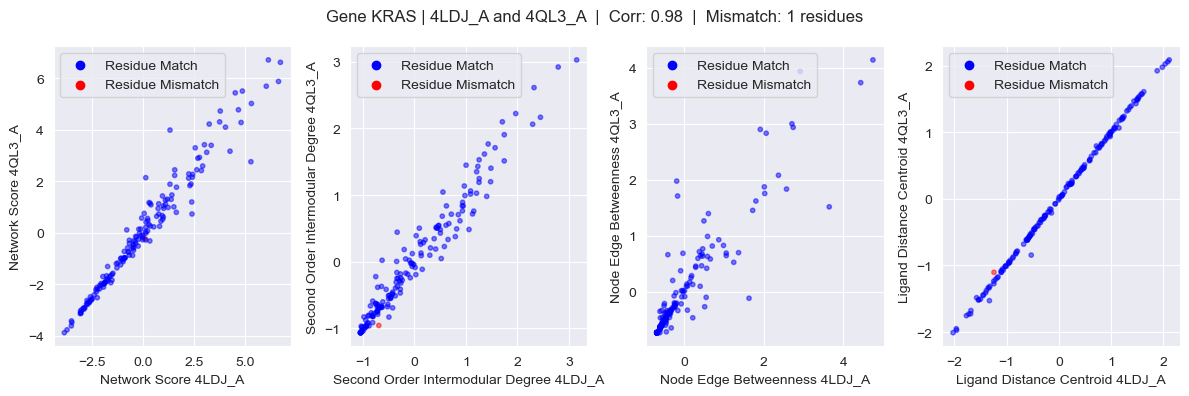

In [87]:
plot_scatter(all_data, '4LDJ_A', '4QL3_A')

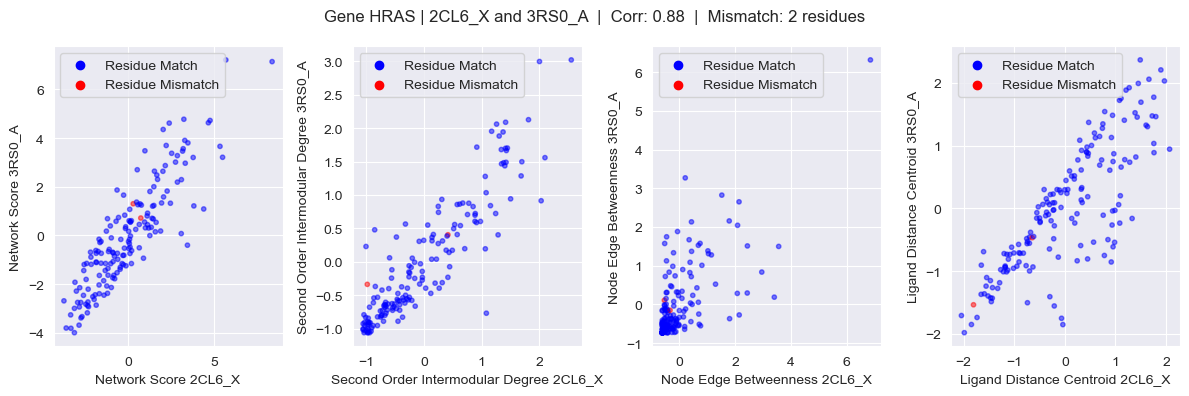

In [88]:
plot_scatter(all_data, '2CL6_X', '3RS0_A')


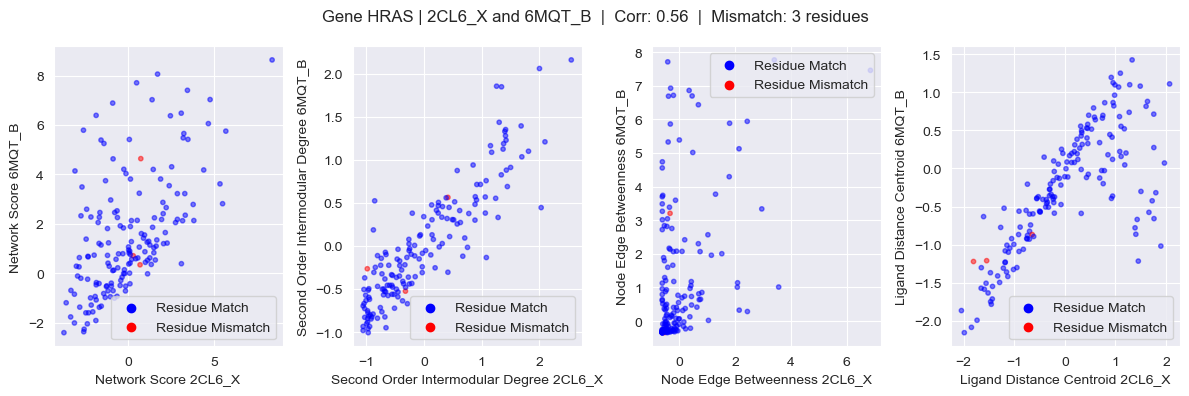

In [89]:
plot_scatter(all_data, '6MQT_B', '2CL6_X')


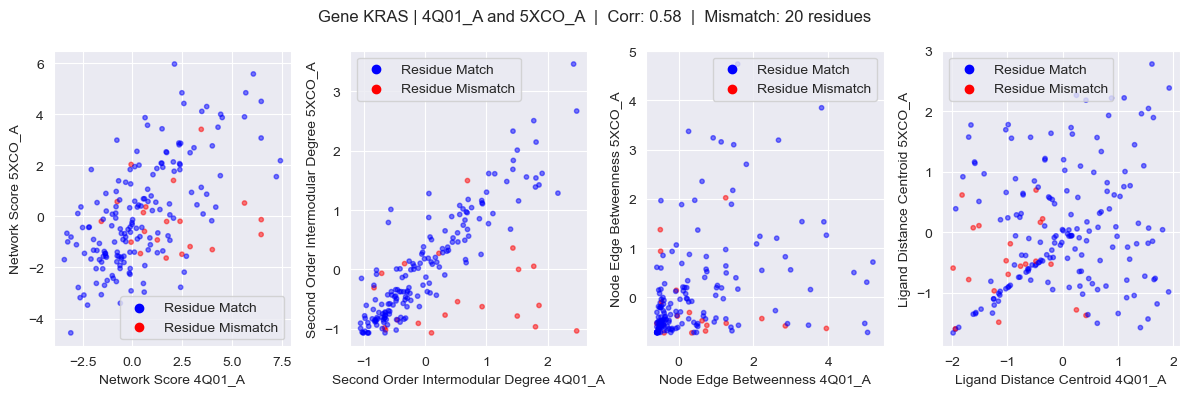

In [90]:
plot_scatter(all_data, '4Q01_A', '5XCO_A')

It is not clear if having residue mismatches is what's causing the disparity in network scores...

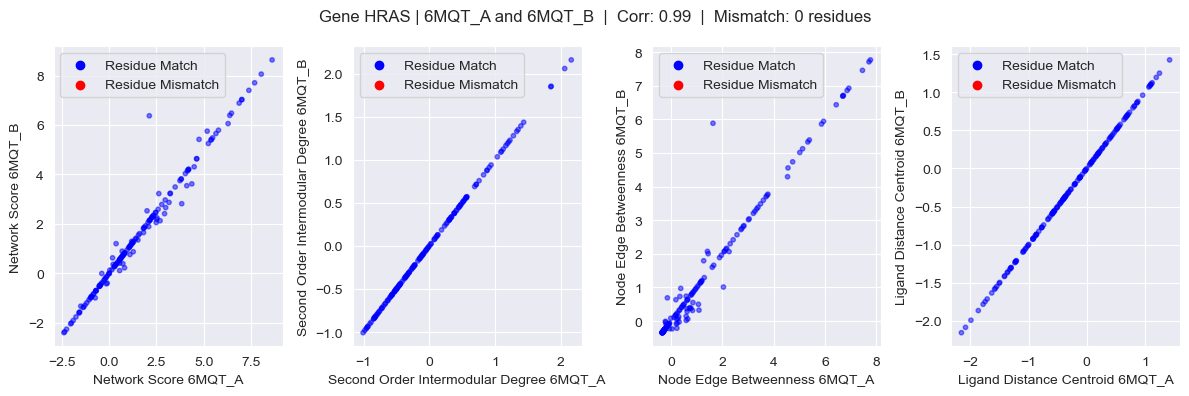

In [91]:
plot_scatter(all_data, '6MQT_B', '6MQT_A')

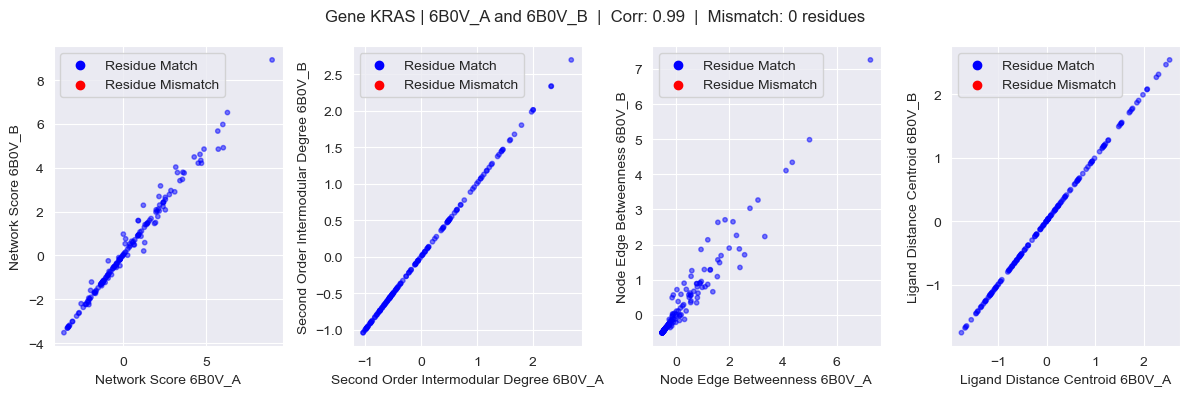

In [92]:
plot_scatter(all_data, '6B0V_A', '6B0V_B')

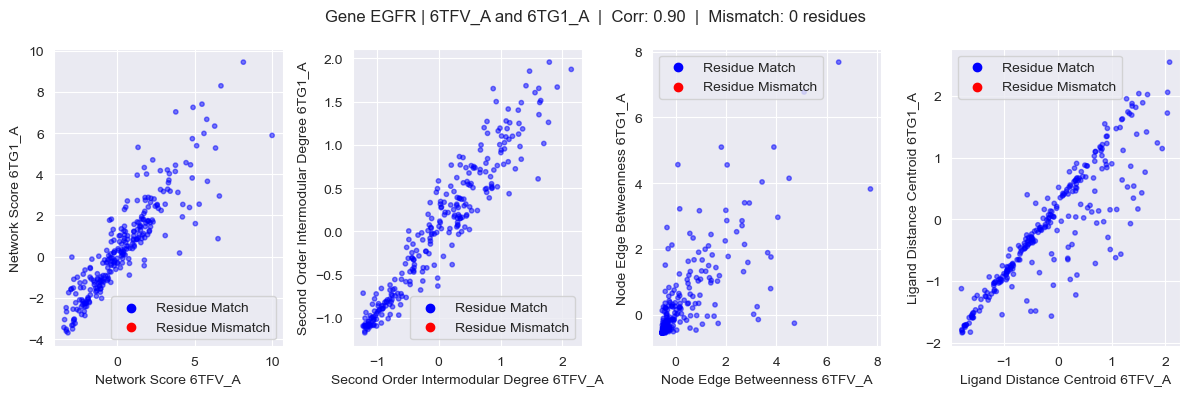

In [93]:
plot_scatter(all_data, '6TFV_A', '6TG1_A')


These have the same residues, but somehow have different network scores?? Why is that? Why does '6MQT_B', '6MQT_A' have an outlier?

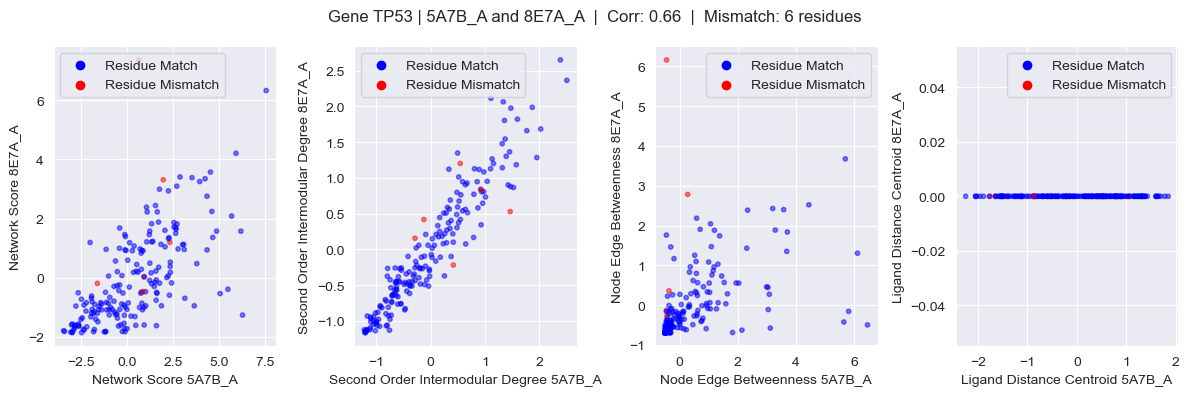

In [94]:
plot_scatter(all_data, '8E7A_A', '5A7B_A')


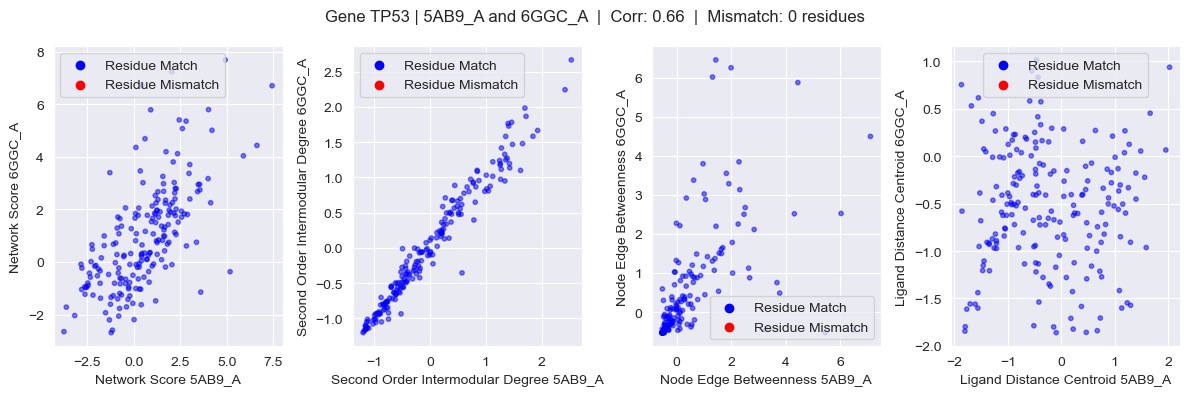

In [97]:
plot_scatter(all_data, '5AB9_A', '6GGC_A')

# amino acid NS distribution

In [53]:
aa_properties = pd.read_csv('../data_prep/aa_properties.csv')
aa_properties['aa'] = aa_properties['aa3'] + ' (' + aa_properties['aa1'] + ')'
aa_properties.head()


,aa1,aa3,Acid Type,Density (nm−2−2),aa
0,I,Ile,Hydrophobic,4.83,Ile (I)
1,A,Ala,Hydrophobic,5.77,Ala (A)
2,F,Phe,Hydrophobic,4.96,Phe (F)
3,L,Leu,Hydrophobic,5.11,Leu (L)
4,M,Met,Hydrophobic,5.63,Met (M)


In [54]:
# make a dict of aa1: Acid Type
aa_properties_dict = {}
for i in range(len(aa_properties)):
    aa_properties_dict[aa_properties['aa1'][i]] = aa_properties['Acid Type'][i]
aa_properties_dict

{'I': 'Hydrophobic',
 'A': 'Hydrophobic',
 'F': 'Hydrophobic',
 'L': 'Hydrophobic',
 'M': 'Hydrophobic',
 'P': 'Special cases',
 'V': 'Hydrophobic',
 'W': 'Hydrophobic',
 'C': 'Special cases',
 'G': 'Special cases',
 'T': 'Polar uncharged',
 'S': 'Polar uncharged',
 'Y': 'Hydrophobic',
 'Q': 'Polar uncharged',
 'N': 'Polar uncharged',
 'H': 'Polar charged positive',
 'K': 'Polar charged positive',
 'E': 'Polar charged negative',
 'R': 'Polar charged positive',
 'D': 'Polar charged negative'}

In [55]:
ns_data = pd.read_csv('../lung_cancer/wt_ns_aggregated.csv')
ns_data.head()

,gene,uniprot_num,uniprot_aa,sbna_aa1,network_score,SecondOrderIntermodularDegree_AVERAGE,NodeEdgeBetweennessSTRIDE_sidechain_MAX,LigandMULTIMERCENTROIDSC_MIN,cgc_tier,cancer_role,cbioportal_freq,uniprot_aa_type
0,AKT1,1,M,M,-1.442056,-0.831746,-0.478642,0.131669,1,oncogene,0,Nonpolar
1,AKT1,63,M,M,-0.798672,-0.378048,-0.040428,0.380196,1,oncogene,0,Nonpolar
2,AKT1,118,M,M,-1.451314,-0.850082,-0.685275,-0.084043,1,oncogene,0,Nonpolar
3,ALK,1089,M,M,-0.358116,1.118639,-0.459551,1.017204,1,oncogene,0,Nonpolar
4,ALK,1166,M,M,-0.979742,-0.512846,-0.413243,0.053652,1,oncogene,0,Nonpolar


In [56]:
from Bio.SeqUtils import seq3

ns_data['uniprot_aa_type'] = ns_data['uniprot_aa'].map(aa_properties_dict)
ns_data['sbna_aa_type'] = ns_data['sbna_aa1'].map(aa_properties_dict)
ns_data['sbna_aa3'] = ns_data['sbna_aa1'].map(seq3)
ns_data['sbna_aa'] = ns_data['sbna_aa3'] + ' (' + ns_data['sbna_aa1'] + ')'

ns_data.head()

,gene,uniprot_num,uniprot_aa,sbna_aa1,network_score,SecondOrderIntermodularDegree_AVERAGE,NodeEdgeBetweennessSTRIDE_sidechain_MAX,LigandMULTIMERCENTROIDSC_MIN,cgc_tier,cancer_role,cbioportal_freq,uniprot_aa_type,sbna_aa_type,sbna_aa3,sbna_aa
0,AKT1,1,M,M,-1.442056,-0.831746,-0.478642,0.131669,1,oncogene,0,Hydrophobic,Hydrophobic,Met,Met (M)
1,AKT1,63,M,M,-0.798672,-0.378048,-0.040428,0.380196,1,oncogene,0,Hydrophobic,Hydrophobic,Met,Met (M)
2,AKT1,118,M,M,-1.451314,-0.850082,-0.685275,-0.084043,1,oncogene,0,Hydrophobic,Hydrophobic,Met,Met (M)
3,ALK,1089,M,M,-0.358116,1.118639,-0.459551,1.017204,1,oncogene,0,Hydrophobic,Hydrophobic,Met,Met (M)
4,ALK,1166,M,M,-0.979742,-0.512846,-0.413243,0.053652,1,oncogene,0,Hydrophobic,Hydrophobic,Met,Met (M)


C:\Users\liyoa\AppData\Local\Temp\ipykernel_15364\3406537496.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



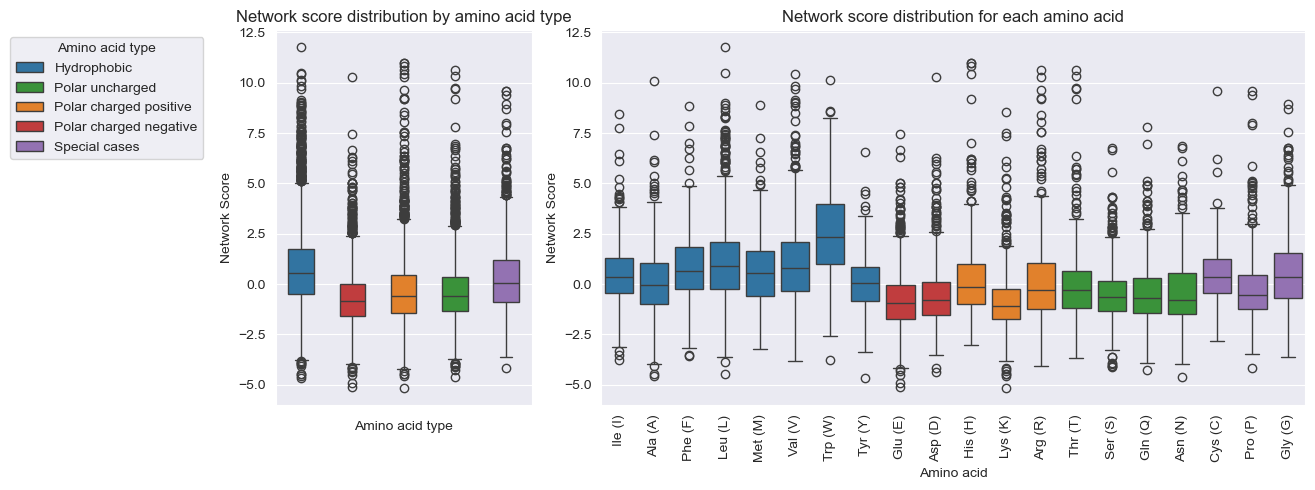

In [59]:
color_mapping = {
    'Hydrophobic': '#1f77b4',  # Blue
    'Polar uncharged': '#2ca02c',  # Green
    'Polar charged positive': '#ff7f0e',  # Orange
    'Polar charged negative': '#d62728',  # Red
    'Special cases': '#9467bd'  # Purple
}


# plot same but as subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [0.8, 2.2]})
fig.subplots_adjust(hspace=0.4, wspace=20)

sns.boxplot(data=ns_data, x='sbna_aa_type', y='network_score', hue='sbna_aa_type', palette=color_mapping, width=0.5, ax=axes[0],  order=aa_properties.sort_values('Acid Type')['Acid Type'])
axes[0].set_title('Network score distribution by amino acid type')

sns.boxplot(data=ns_data, x='sbna_aa', y='network_score', hue='sbna_aa_type', palette=color_mapping, order=aa_properties.sort_values('Acid Type')['aa'], ax=axes[1])
axes[1].set_title('Network score distribution for each amino acid')

axes[0].set_xticklabels([])
axes[0].set_xlabel('Amino acid type')
axes[0].set_ylabel('Network Score')
# rotate x-axis labels
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_xlabel('Amino acid')
axes[1].set_ylabel('Network Score')

# put legend outside of plot
plt.legend(title='Amino acid type', bbox_to_anchor=(-0.85, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [68]:
from Bio.SeqUtils import seq3
seq3("I")

'Ile'

# do for wild type ONLY~!

In [8]:
ns_data['uniprot_aa_type'].unique()

array(['Hydrophobic', 'Polar uncharged', 'Polar charged negative',
       'Polar charged positive', 'Special cases', nan], dtype=object)

In [100]:
import numpy as np
from scipy.stats import f_oneway

# Example network scores for the three groups
group1 = ns_data[ns_data['uniprot_aa_type']=='Hydrophobic']['network_score']
group2 = ns_data[ns_data['uniprot_aa_type']=='Polar uncharged']['network_score']
group3 = ns_data[ns_data['uniprot_aa_type']=='Polar charged negative']['network_score']
group4 = ns_data[ns_data['uniprot_aa_type']=='Polar charged positive']['network_score']
group5 = ns_data[ns_data['uniprot_aa_type']=='Special cases']['network_score']


# Perform one-way ANOVA
statistic, p_value = f_oneway(group1, group2, group3, group4, group5)

# Print the results
print(f"F-statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("The differences between the group means are statistically significant (reject H0).")
else:
    print("The differences between the group means are not statistically significant (fail to reject H0).")

F-statistic: 238.8004224316692
P-value: 8.467322019869e-197
The differences between the group means are statistically significant (reject H0).


In [10]:
p_value

0.0

In [27]:
# unique gene and cancer_role
# count how many cancer_roles there are
ns_data.groupby('cancer_role', dropna=False)['gene'].nunique()



cancer_role
TSG         10
fusion       4
oncogene    17
NaN          3
Name: gene, dtype: int64

# METHODOGY

In [22]:
ns_data = pd.read_csv("../lung_cancer/lung_genes_sbna.csv")
ns_data = ns_data[(ns_data['gene']=="TP53")&(ns_data['mutant']=="N")]
ns_data

,gene,pdb_id,chain,sbna_aa3,sbna_num,sbna_aa1,uniprot_num,uniprot_aa,network_score,SecondOrderIntermodularDegree_AVERAGE,NodeEdgeBetweennessSTRIDE_sidechain_MAX,LigandMULTIMERCENTROIDSC_MIN,mutant,mutations,cgc_tier,cancer_role,uniprot_aa_type,sbna_aa_type
49998,TP53,2OCJ,A,SER,96,S,94,S,-1.192720,-0.725346,-0.467374,0.0,N,NaN,1,TSG,Polar uncharged,Polar uncharged
49999,TP53,2OCJ,A,VAL,97,V,97,V,-0.428416,-0.599832,0.171416,0.0,N,NaN,1,TSG,Hydrophobic,Hydrophobic
50000,TP53,2OCJ,A,PRO,98,P,98,P,-0.192615,-0.242125,0.049510,0.0,N,NaN,1,TSG,Special cases,Special cases
50001,TP53,2OCJ,A,SER,99,S,99,S,-0.952674,-0.577020,-0.375654,0.0,N,NaN,1,TSG,Polar uncharged,Polar uncharged
50002,TP53,2OCJ,A,GLN,100,Q,100,Q,-0.175387,-0.362780,0.187393,0.0,N,NaN,1,TSG,Polar uncharged,Polar uncharged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50769,TP53,2OCJ,D,GLU,285,E,285,E,0.065259,-0.178603,0.243862,0.0,N,NaN,1,TSG,Polar charged negative,Polar charged negative
50770,TP53,2OCJ,D,GLU,286,E,286,E,-1.102147,-0.604303,-0.497844,0.0,N,NaN,1,TSG,Polar charged negative,Polar charged negative
50771,TP53,2OCJ,D,GLU,287,E,287,E,-1.665592,-1.129128,-0.536464,0.0,N,NaN,1,TSG,Polar charged negative,Polar charged negative
50772,TP53,2OCJ,D,ASN,288,N,288,N,-1.482230,-1.044008,-0.438221,0.0,N,NaN,1,TSG,Polar uncharged,Polar uncharged


In [23]:
print(len(ns_data['pdb_id'].unique()))
print(len(ns_data['gene'].unique()))
print(len(ns_data))
print

1
1
776


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [17]:
# read xlsx
tmp = pd.read_excel("../lung_cancer/lung_genes.xlsx", sheet_name="all structures")
tmp['pdb_id'].nunique()

54